Text(0, 0.5, 'Y')

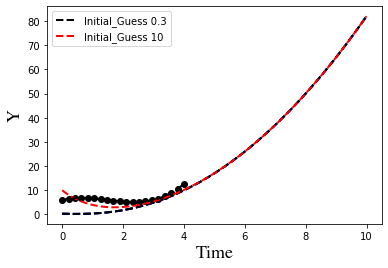

In [42]:
#### scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, 
### dense_output=False, events=None, vectorized=False, args=None, **options)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

tspan = np.linspace(0,10,200)
y0 = [0.3]

def function1(t,y):
    dydt = t**2 - y 
    return dydt

sol = solve_ivp(function1, (tspan[0],tspan[-1]), y0, t_eval = tspan, rtol = 1e-5)
plt.plot(sol.t, sol.y[0],'--',color = 'black', lw=2)
plt.xlabel('Time',fontname = 'Times',fontsize = 18)
plt.ylabel('Y',fontname = 'Times',fontsize = 18)


sol2 = solve_ivp(lambda t,y: t**2 - y,(tspan[0],tspan[-1]), y0, t_eval = tspan, rtol = 1e-5)
plt.plot(sol2.t, sol2.y[0],'--',color = 'blue', lw=2)
plt.xlabel('Time',fontname = 'Times',fontsize = 18)
plt.ylabel('Y',fontname = 'Times',fontsize = 18)




#### what if we have multiple initial guesses? 
y0 = [0.3,10]
def function1(t,y):
    dydt = t**2 - y 
    return dydt

sol = solve_ivp(function1, (tspan[0],tspan[-1]), y0, t_eval = tspan, rtol = 1e-5)

col = ['black','red']
for i in range(2):
    plt.plot(sol.t, sol.y[i],'--',color = col[i], lw=2,label = 'Initial_Guess '+str(y0[i]))
plt.xlabel('Time',fontname = 'Times',fontsize = 18)
plt.ylabel('Y',fontname = 'Times',fontsize = 18)
plt.legend()



#### if we have more inputs to the function
# %% Define derivative function
def f(t, y, para):
    dydt = para[0]*t**2 + para[1]*t + para[2];  
    return dydt
    
# %% Define time spans, initial values, and constants
tspan = np.linspace(0, 4, 20)
yinit = [6]
para = [2, -6, 3]

# %% Solve differential equation use lambda to specify the dependent variables. 
sol = solve_ivp(lambda t, y: f(t, y, para), 
             (tspan[0], tspan[-1]), yinit, t_eval = tspan, rtol = 1e-5)


# %% Plot states
plt.scatter(sol.t, sol.y[0], color = 'black', alpha=1)
plt.plot(sol.t, sol.y[0],'--',color = 'black', lw=2)
plt.xlabel('Time',fontname = 'Times',fontsize = 18)
plt.ylabel('Y',fontname = 'Times',fontsize = 18)



Text(0, 0.5, 'Y')

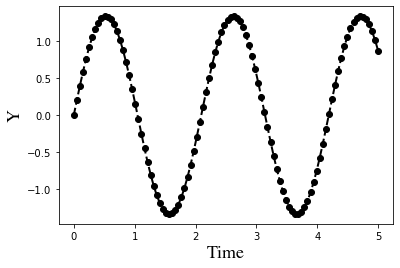

In [53]:
# %% multiple ODE functions

### dy1/dt = 4*cos(3t);
### dy2/dt = -2y1 + 0.5t;


def f(t, y, c):
    dy1dt = c[0]*np.cos(c[1]*t)
    dy2dt = c[2]*y[0] + c[3]*t
    
    dydt = [dy1dt,dy2dt]
    return dydt

#### if you have many equations
def f2(t, y, c):
    y1 = y[0]
    y2 = y[1]
    dy1dt = c[0]*np.cos(c[1]*t)
    dy2dt = c[2]*y1 + c[3]*t
    return [dy1dt,dy2dt]

# %% Define time spans, initial values, and constants
tspan = np.linspace(0, 5, 100)
yinit = [0, -3]
c = [4, 3, -2, 0.5]

# %% Solve differential equation
sol2 = solve_ivp(lambda t, y: f2(t, y, c), 
                [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol = 1e-5)

plt.scatter(sol2.t, sol2.y[0], color = 'black', alpha=1)
plt.plot(sol2.t, sol2.y[0],'--',color = 'black', lw=2)
plt.xlabel('Time',fontname = 'Times',fontsize = 18)
plt.ylabel('Y',fontname = 'Times',fontsize = 18)

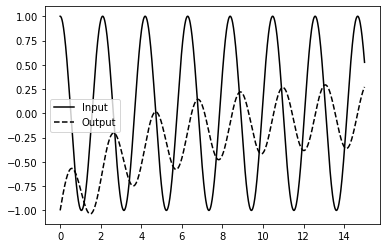

In [70]:
# %% Define independent function and derivative function
def x(t):
    return np.cos(3 * t)

def f(t, y):
    dydt = x(t) - y / 4
    return dydt

# %% Define time spans, initial values, and constants
tspan = np.linspace(0, 15, 1000)
yinit = [-1]
#c = []

# %% Solve differential equation
#sol = solve_ivp(lambda t, y: f(t, y),#, c),
                #[tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol = 1e-5)

sol = solve_ivp(f,[tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol = 1e-5)


# %% Plot independent and dependent variable
# Note that sol.y[0] is needed to extract a 1-D array
plt.figure(1)
plt.clf()
fig, ax = plt.subplots(num=1)
ax.plot(sol.t, x(sol.t), 'k-', label='Input')
ax.plot(sol.t, sol.y[0], 'k--', label='Output')
ax.legend(loc='best')

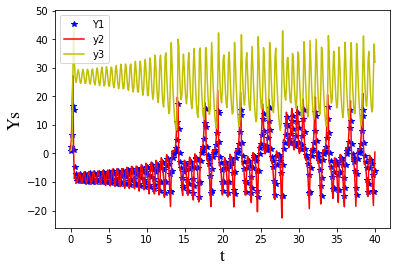

In [78]:
#### in-class exercise
## dy1dt = sigma*(y2-y1)
## dy2dt = y1*(rho - y3) - y2
## dy3dt = y1*y2 - beta*y3

## initial guess y0 = [1.0,1.0,1.0]
## sigma = 10.0
## beta = 8.0/3.0
## rho = 28.0
## tspan = np.linspace(0.0, 40.0, 400)


def lorenz(t, y, sigma, beta, rho):
    y1 = y[0]
    y2 = y[1]
    y3 = y[2]
     
    dy1dt = sigma * (y2 - y1)
    dy2dt = y1 * (rho - y3) - y2
    dy3dt = y1 * y2 - beta * y3
     
    return [dy1dt, dy2dt, dy3dt]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0
 
p = (sigma, beta, rho)  # Parameters of the system
 
y0 = [1.0, 1.0, 1.0]  # Initial state of the system
tspan = np.linspace(0.0, 40.0, 400)
 
result_solve_ivp = solve_ivp(lorenz, [tspan[0], tspan[-1]], y0, t_eval=tspan, args = p,rtol = 1e-5)
 
tplot = result_solve_ivp.t
y1 = result_solve_ivp.y[0]
y2 = result_solve_ivp.y[1]
y3 = result_solve_ivp.y[2]

fig,ax = plt.subplots()
ax.plot(tplot,y1,'*b',label='Y1')
ax.plot(tplot,y2,'r',label='y2')
ax.plot(tplot,y3,'y',label='y3')
ax.legend()
ax.set_xlabel('t',font='Times',fontsize = 18)
ax.set_ylabel('Ys',font='Times',fontsize = 18)
plt.show()


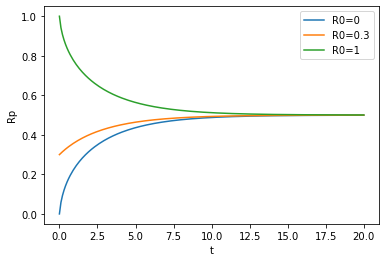

In [59]:
### alternatively we can solve with odeint


from scipy.integrate import odeint
import numpy
import matplotlib.pyplot as plt

def model(Rp,t,S,k1,k2,Rt,km1,km2):
    dRpdt = (k1*S*(Rt-Rp)/(km1+Rt-Rp)) - k2*Rp/(km2+Rp)
    return dRpdt

S = 1
k1 = 1
k2 = 1
Rt = 1
km1 = 0.05
km2 = 0.05
Rp0 = [0,0.3,1]
t = np.linspace(0,20,200)
result = odeint(model,Rp0,t,args = (S,k1,k2,Rt,km1,km2,))

fig,ax = plt.subplots()
ax.plot(t,result[:,0],label='R0=0')
ax.plot(t,result[:,1],label='R0=0.3')
ax.plot(t,result[:,2],label='R0=1')
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('Rp')
plt.show()

In [ ]:
def model(z,t,para,condition):

    Cas9 = z[0]
    sgRNA_1 = z[1]
    sgRNA_2 = z[2]
    Cas9C_1 = z[3]
    Cas9C_2 = z[4]

    P_1Free = z[5]
    P_2Free = z[6]

    P_1Bound = z[7]
    P_2Bound = z[8]

    GFP_1 = z[9]
    GFP_2 = z[10]

    dCas9dt = para['alpha_cas9']*condition['P_cas9'] - para['gamma_sg1']*Cas9*sgRNA_1 - para['gamma_sg2']*Cas9*sgRNA_2

    dsgRNA_1dt = para['alpha_sg1']*condition['P_sg1'] - para['delta_sg1']*sgRNA_1 - para['gamma_sg1']*Cas9*sgRNA_1

    dsgRNA_2dt = para['alpha_sg2']*condition['P_sg2'] - para['delta_sg2']*sgRNA_2 - para['gamma_sg2']*Cas9*sgRNA_2

    dCas9C_1dt = para['gamma_sg1']*Cas9*sgRNA_1 - para['omega_1']*Cas9C_1*condition['P_1']

    dCas9C_2dt = para['gamma_sg2']*Cas9*sgRNA_2 - para['omega_2']*Cas9C_2*condition['P_2']

    dP_1Freedt = -1* para['omega_1']*Cas9C_1*P_1Free

    dP_2Freedt = -1* para['omega_2']*Cas9C_2*P_2Free

    dP_1Bounddt = para['omega_1']*Cas9C_1*P_1Free

    dP_2Bounddt = para['omega_2']*Cas9C_2*P_2Free

    dGFP_1dt = para['alpha_GFP1']*P_1Free

    dGFP_2dt = para['alpha_GFP2']*P_2Free

    dzdt = [dCas9dt, dsgRNA_1dt, dsgRNA_2dt, dCas9C_1dt, dCas9C_2dt, dP_1Freedt, dP_2Freedt, dP_1Bounddt, dP_2Bounddt, dGFP_1dt, dGFP_2dt]
    return dzdt


para = {'alpha_cas9':0.05,
        'alpha_sg1':0.5,
        'alpha_sg2':0.5,
        'alpha_GFP1':0.05,
        'alpha_GFP2':0.05,
        'delta_sg1':0.5,
        'delta_sg2':0.5,
        'gamma_sg1':10**5,
        'gamma_sg2':10**5,
        'omega_1':10**5,
        'omega_2':10**5}


#### number of time points
tf = 7200
#### time points
tspan = np.linspace(0.0,7200.0,7200)
#### store solution


condition = {'P_cas9': 10**(-10),
    'P_sg1': {},
    'P_sg2': {},
    'P_1': 10**(-9),
    'P_2': 10**(-9)
    }


fig,axe = plt.subplots(1,1,sharey = False)

for sub in range(3):
#### initial condition
    if sub == 0:
        condition['P_sg1'] = 5*10**(-9)
        condition['P_sg2'] = 0
    elif sub == 1:
        condition['P_sg1'] = 0
        condition['P_sg2'] = 5*10**(-9)
    else:
        condition['P_sg1'] = 5*10**(-9)
        condition['P_sg2'] = 5*10**(-9)
    
    z0 = [0,0,0,0,0,condition['P_1'],condition['P_2'],0,0,0,0]
    sol = odeint(model,z0,tspan,args=(para,condition))
    
    axe.plot(tspan,sol[:,9],'--',lw=2,label = 'Condition '+str(sub))
axe.legend()
axe.set_xlabel('Time',font='Times',fontsize=18)
axe.set_ylabel('Concentration',font='Times',fontsize=18)

    